# import

In [1]:
import numpy as np
import pandas as pd

import datetime
from datetime import datetime, date

In [2]:
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# pd.Series()

In [4]:
s = pd.Series([1,2,3,4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [5]:
s[1]

2

In [6]:
s[[1,3]]

1    2
3    4
dtype: int64

In [7]:
s = pd.Series([1,2,3,4],
             index = ['a','b','c','d'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [8]:
s[['a','b']]

a    1
b    2
dtype: int64

In [9]:
s[[1,2]]

b    2
c    3
dtype: int64

In [10]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [11]:
dates = pd.date_range('2016-04-01', '2016-04-06')
dates

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
temps1 = pd.Series([80, 82, 85, 90, 83, 87],
                  index = dates)
temps1

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, dtype: int64

In [13]:
temps1['2016-04-04']

90

In [14]:
temps2 = pd.Series([70, 75, 69, 83, 79, 77],
                  index=dates)

temp_diffs = temps1 - temps2 # available when(temps1.index == temps2.index)
temp_diffs

2016-04-01    10
2016-04-02     7
2016-04-03    16
2016-04-04     7
2016-04-05     4
2016-04-06    10
Freq: D, dtype: int64

In [15]:
temp_diffs.mean()

9.0

# pd.DataFrame()

In [16]:
temps_df = pd.DataFrame(
{'Missoula':temps1,
'Philadelphia':temps2})
temps_df

            Missoula  Philadelphia
2016-04-01        80            70
2016-04-02        82            75
2016-04-03        85            69
2016-04-04        90            83
2016-04-05        83            79
2016-04-06        87            77

In [17]:
temps_df['Missoula']

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, Name: Missoula, dtype: int64

In [19]:
temps_df['Philadelphia']

2016-04-01    70
2016-04-02    75
2016-04-03    69
2016-04-04    83
2016-04-05    79
2016-04-06    77
Freq: D, Name: Philadelphia, dtype: int64

In [20]:
temps_df[['Philadelphia','Missoula']]

            Philadelphia  Missoula
2016-04-01            70        80
2016-04-02            75        82
2016-04-03            69        85
2016-04-04            83        90
2016-04-05            79        83
2016-04-06            77        87

In [21]:
temps_df.Missoula

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, Name: Missoula, dtype: int64

In [22]:
temps_df.Missoula - temps_df.Philadelphia

2016-04-01    10
2016-04-02     7
2016-04-03    16
2016-04-04     7
2016-04-05     4
2016-04-06    10
Freq: D, dtype: int64

In [23]:
temps_df['Difference'] = temp_diffs
temps_df

            Missoula  Philadelphia  Difference
2016-04-01        80            70          10
2016-04-02        82            75           7
2016-04-03        85            69          16
2016-04-04        90            83           7
2016-04-05        83            79           4
2016-04-06        87            77          10

In [24]:
temps_df.columns

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [25]:
temps_df.Difference[1:4]

2016-04-02     7
2016-04-03    16
2016-04-04     7
Freq: D, Name: Difference, dtype: int64

In [26]:
temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2016-04-02 00:00:00, dtype: int64

In [27]:
temps_df.iloc[1].index

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [28]:
temps_df.loc['2016-04-05']

Missoula        83
Philadelphia    79
Difference       4
Name: 2016-04-05 00:00:00, dtype: int64

In [29]:
temps_df.iloc[[1,3,5]].Difference

2016-04-02     7
2016-04-04     7
2016-04-06    10
Freq: 2D, Name: Difference, dtype: int64

In [31]:
temps_df.Missoula>82

2016-04-01    False
2016-04-02    False
2016-04-03     True
2016-04-04     True
2016-04-05     True
2016-04-06     True
Freq: D, Name: Missoula, dtype: bool

In [32]:
temps_df[temps_df.Missoula>82]

            Missoula  Philadelphia  Difference
2016-04-03        85            69          16
2016-04-04        90            83           7
2016-04-05        83            79           4
2016-04-06        87            77          10

# pd.read_csv()

In [53]:
df1 = pd.read_csv('../data/goog.csv',
                 parse_dates=['Date'],
                 index_col='Date')
df1

                  Open        High         Low       Close   Volume
Date                                                               
2016-12-19  790.219971  797.659973  786.270020  794.200012  1225900
2016-12-20  796.760010  798.650024  793.270020  796.419983   925100
2016-12-21  795.840027  796.676025  787.099976  794.559998  1208700
2016-12-22  792.359985  793.320007  788.580017  791.260010   969100
2016-12-23  790.900024  792.739990  787.280029  789.909973   623400
...                ...         ...         ...         ...      ...
2017-03-13  844.000000  848.684998  843.250000  845.539978  1149500
2017-03-14  843.640015  847.239990  840.799988  845.619995   779900
2017-03-15  847.590027  848.630005  840.770020  847.200012  1379600
2017-03-16  849.030029  850.849976  846.130005  848.780029   970400
2017-03-17  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 5 columns]

In [42]:
df.Date[0]

'12/19/2016'

In [43]:
type(df.Date[0])

str

In [46]:
df = pd.read_csv('../data/COVID 19 Cm data.csv', parse_dates=['DateStart'])
df

        ID         Country  DateStart Dateend intended  ... Target city  \
0     163          Austria 2020-03-16              NaN  ...         NaN   
1     132          Germany 2020-02-01              NaN  ...         NaN   
2     578   United Kingdom 2020-03-20              NaN  ...         NaN   
3     372   United Kingdom 2020-03-16              NaN  ...         NaN   
4     357   United Kingdom 2020-03-16              NaN  ...         NaN   
...    ...             ...        ...              ...  ...         ...   
1698  100     US:Louisiana 2020-03-11              NaN  ...         NaN   
1699  100     US:Louisiana 2020-03-13              NaN  ...         NaN   
1700  100     US:Louisiana 2020-03-13              NaN  ...         NaN   
1701  100     US:Louisiana 2020-03-13              NaN  ...         NaN   
1702  100     US:Louisiana 2020-03-17              NaN  ...         NaN   

     Target country Target region Target state  
0               NaN           NaN          NaN  
1

In [47]:
type(df.DateStart[0])

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
df.index

RangeIndex(start=0, stop=1703, step=1)

In [49]:
df = pd.read_csv('../data/COVID 19 Cm data.csv',
                parse_dates=['DateStart'],
                index_col = 'DateStart')
df

              ID         Country Dateend intended  \
DateStart                                           
2020-03-16  163          Austria              NaN   
2020-02-01  132          Germany              NaN   
2020-03-20  578   United Kingdom              NaN   
2020-03-16  372   United Kingdom              NaN   
2020-03-16  357   United Kingdom              NaN   
...          ...             ...              ...   
2020-03-11  100     US:Louisiana              NaN   
2020-03-13  100     US:Louisiana              NaN   
2020-03-13  100     US:Louisiana              NaN   
2020-03-13  100     US:Louisiana              NaN   
2020-03-17  100     US:Louisiana              NaN   

                           Description of measure implemented  ...  \
DateStart                                                      ...   
2020-03-16  On 10 March 2020 government announced that all...  ...   
2020-02-01  102 German citizens and 26 relatives, all of w...  ...   
2020-03-20        All schools,

# Visualization

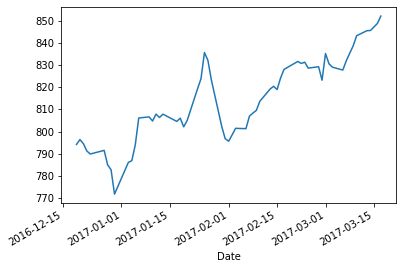

In [54]:
df1.Close.plot()

In [ ]:
plt.xlabel('index')